# Classifying Google's Quickdraw Drawings 

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm

---
## Visualizer Functions
These are some helper functions

In [2]:
def show(tensor, labels):
    fig, ax = plt.subplots(3, 10, figsize = (16, 8))
    for i in range(3):
        for j in range(10):
            x = np.random.randint(0, len(tensor))
            ax[i,j].matshow(tensor.reshape(-1, 28, 28)[x], cmap=cm.gray_r)
            ax[i,j].set_title("{}".format(labels[x]))
            ax[i,j].axis('off')
    plt.show()

In [ ]:
def plotter(history):
    at, av, lt, lv = zip(*history)
    fig = plt.figure(figsize=(15, 8)); ax1 = fig.add_subplot(221); ax2 = fig.add_subplot(222)

    ax1.plot(np.arange(0, len(at), 1), at,".-", color='#2A6EA6', label="Training: {0:.2f}%".format(at[-1]))
    ax1.plot(np.arange(0, len(av), 1), av,".-", color='#FFA933', label="Validation: {0:.2f}%".format(av[-1]))
    ax1.grid(True); ax1.legend(loc="lower right"); ax1.set_title("Accuracy per epoch")

    ax2.plot(np.arange(0, len(lt), 1), lt,".-", color='#2A6EA6', label="Training: {0:.2f}".format(lt[-1]))
    ax2.plot(np.arange(0, len(lv), 1), lv,".-", color='#FFA933', label="Validation: {0:.2f}".format(lv[-1]))
    ax2.grid(True); ax2.legend(loc="upper right"); ax2.set_title("Cost per epoch")
    plt.show()

---
## Data Import

In [3]:
datapath = "C:/Users/Runerised/Google Drive/Datasets/Nieuwe map/"
files = os.listdir(datapath)

tensor = np.empty((0, 784))
labels = np.empty(0)
for i, file in enumerate(files):
    data = np.load(datapath+file)[:20000]
    category = np.repeat(file[:-4], data.shape[0])
    tensor = np.append(tensor, data, axis=0)
    labels = np.append(labels, category, axis=0)

In [4]:
pd.DataFrame(tensor).head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
print(labels)

['airplane' 'airplane' 'airplane' ..., 'piano' 'piano' 'piano']


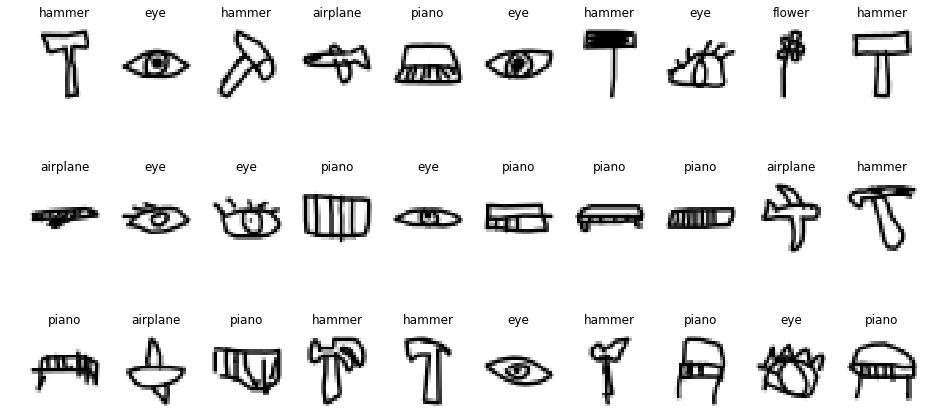

In [6]:
show(tensor, labels)

---
## Data Preproccessing

In [15]:
print('Data set: {} '.format(tensor.shape, labels.shape))

Data set(100000, 28, 28, 1): 


In [16]:
tensor = tensor.reshape(-1, 28, 28, 1)
target = pd.get_dummies(pd.DataFrame(labels)).values

In [19]:
print('Data set: {} '.format(tensor.shape, target.shape))

Data set: (100000, 28, 28, 1) 


In [10]:
from sklearn.model_selection import train_test_split
traindevX, testX, traindevY, testY = train_test_split(tensor, target, test_size=10000, random_state=100)
trainX, validX, trainY, validY = train_test_split(traindevX, traindevY, test_size=10000, random_state=100)

In [11]:
print('Training set:   {} {}'.format(trainX.shape, trainY.shape))
print('Validation set: {} {}'.format(validX.shape, validY.shape))
print('Testing set:    {} {}'.format(testX.shape, testY.shape))

Training set:   (80000, 28, 28, 1) (80000, 5)
Validation set: (10000, 28, 28, 1) (10000, 5)
Testing set:    (10000, 28, 28, 1) (10000, 5)


---
## Convolutional Neural Network

In [21]:
BATCH = 128
FILTERSIZE = 5
NUMFILTERS = 32
HIDDEN = 1024
RATE = 1e-4
STEPS = 20000

In [ ]:
graph = tf.Graph()
with graph.as_default():

    # Input data.
    tfDataX = tf.placeholder(tf.float32, shape=(None, SIZE, SIZE, CHANNELS))
    tfDataY = tf.placeholder(tf.float32, shape=(None, LABELS))
    tfDrop = tf.placeholder(tf.float32)

    # Variables.
    w1 = tf.get_variable('W1', [FILTERSIZE, FILTERSIZE, CHANNELS, NUMFILTERS], initializer=tf.contrib.layers.xavier_initializer()
    w2 = tf.get_variable('W2', [FILTERSIZE, FILTERSIZE, NUMFILTERS, 2*NUMFILTERS], initializer=tf.contrib.layers.xavier_initializer()
    w3 = tf.get_variable('W3', [SIZE//4 * SIZE//4 * NUMFILTERS*2, HIDDEN], initializer=tf.contrib.layers.xavier_initializer()
    w4 = tf.get_variable('W4', [HIDDEN, LABELS], initializer=tf.contrib.layers.xavier_initializer()

    # Model.
    def model(x):
        # Convolutional layer 1
        x = tf.nn.conv2d(x, w1, strides=[1, 1, 1, 1], padding='SAME')
        x = tf.nn.relu(x)
        x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
                         
        # Convolutional layer 2
        x = tf.nn.conv2d(x, w2, strides=[1, 1, 1, 1], padding='SAME')
        x = tf.nn.relu(x)
        x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
                         
        # Fully connected layer
        x = tf.reshape(x, (-1, SIZE//4 * SIZE//4 * NUMFILTERS*4))
        x = tf.nn.relu(tf.matmul(x, w3))
                         
        # Readout layer with dropout
        x = tf.nn.dropout(x, tfDrop)
        x = tf.matmul(x, w4)
        return x
  
    # Training computation.
    logits = model(tfDataX)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=tfDataY))
    optimizer = tf.train.AdamOptimizer(RATE).minimize(cost)

    # Predictions and Accuracy.
    predictions = {"classes": tf.argmax(logits, 1), "probabilities": tf.nn.softmax(logits)}
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions['classes'], tf.argmax(tfDataY, 1)), "float"))

In [ ]:
with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    history = []
    for step in range(STEPS):
        offset = (step * BATCH) % (trainY.shape[0] - BATCH)
        batchX = trainX[offset:(offset + BATCH), :, :, :]
        batchY = trainY[offset:(offset + BATCH), :]
        session.run(optimizer, {tfDataX: batchX, tfDataY: batchY, tfDrop: 0.5})
        if(step % (STEPS // BREAKS) == 0):
            lt, at = session.run([loss, accuracy], {tfDataX: batchX, tfDataY: batchY, tfDrop: 1.0})
            lv, av = session.run([loss, accuracy], {tfDataX: validX, tfDataY: validY, tfDrop: 1.0})
            history.append((at, av, lt, lv))
            print ".",
    predictions = session.run(predictions, {tfDataX: test, tfDrop: 1.0})
    #accuracy = session.run(accuracy, {tfDataX: testX, tfDataY: testY})
    #print('\nTest accuracy: %.2f%%' % accuracy)

In [ ]:
plotter(history[2:])